In [1]:
# -*- coding: utf-8 -*-
import torch
import math
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.datasets import make_friedman1

# Exercici de Regressió


## Generació de les dades
Emprarem un conjunt de dades que s'autogenera a partir de certs paràmetres, la variable a predir es correspon amb la següent formula:

`y(X) = 10 * sin(pi * X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 + 10 * X[:, 3] + 5 * X[:, 4] + noise * N(0, 1).`

Com podeu observar tenium 5 variables útils i les altrs que són independents de `y`. 

[Més informació](https://projecteuclid.org/journals/annals-of-statistics/volume-19/issue-1/Multivariate-Adaptive-Regression-Splines/10.1214/aos/1176347963.full)

In [2]:
X, y = make_friedman1(n_samples=2000, n_features=10, noise=0.0, random_state=33)

X = torch.from_numpy(X)
y =  torch.from_numpy(y)
X = X.float()
y = y.float()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [ ]:
print(X_train.shape)
print(y_train.shape)

torch.Size([670, 10])
torch.Size([670])


## Definició de la xarxa

In [7]:
model = torch.nn.Sequential(
    torch.nn.Linear(10, 8),
    torch.nn.Linear(8, 5),
    torch.nn.Linear(5, 5),
    torch.nn.Linear(5, 5),
    torch.nn.Linear(5, 5),
    torch.nn.Linear(5, 1),
    torch.nn.Flatten(0, 1))

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

## Entrenament# 


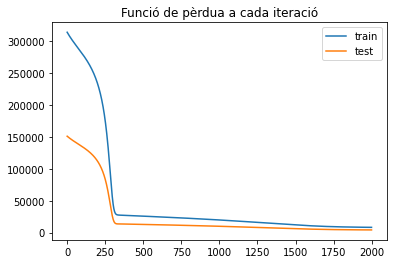

In [8]:
learning_rate =  1e-7
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

iter = 2000
loss_p = np.zeros((iter))
loss_t = np.zeros((iter))

for t in range(iter):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(X_train)
    y_pred_test = model(X_test)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y_train)
    loss_test = loss_fn(y_pred_test, y_test)
    loss_p[t] = loss.item()
    loss_t[t] = loss_test.item()
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()

    loss.backward()
    optimizer.step()  

plt.title("Funció de pèrdua a cada iteració")
plt.plot(loss_p, label="train")
plt.plot(loss_t, label="test")
plt.legend()
plt.show()

## Resultats



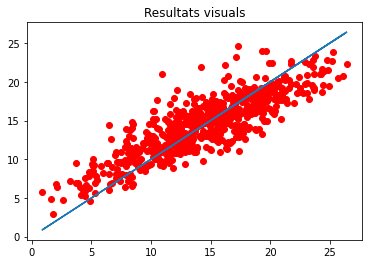

In [9]:
y_pred = model(X_test)

plt.title("Resultats visuals")
plt.scatter(y_test, y_pred.detach().numpy(), c="red")
plt.plot(y_test, y_test)
plt.show()